In [1]:
#0.3

             Model  Train_R2_Mean  Train_R2_Std  Test_R2_Mean  Test_R2_Std
0         AdaBoost       0.935023      0.024058      0.649997     0.112661
1  GaussianProcess       0.173942      0.085488     -0.099123     0.239707
2              KNN       0.691826      0.266241      0.312638     0.186099
3     RandomForest       0.903786      0.073403      0.625690     0.115488
4          XGBoost       0.917299      0.052063      0.681088     0.098651


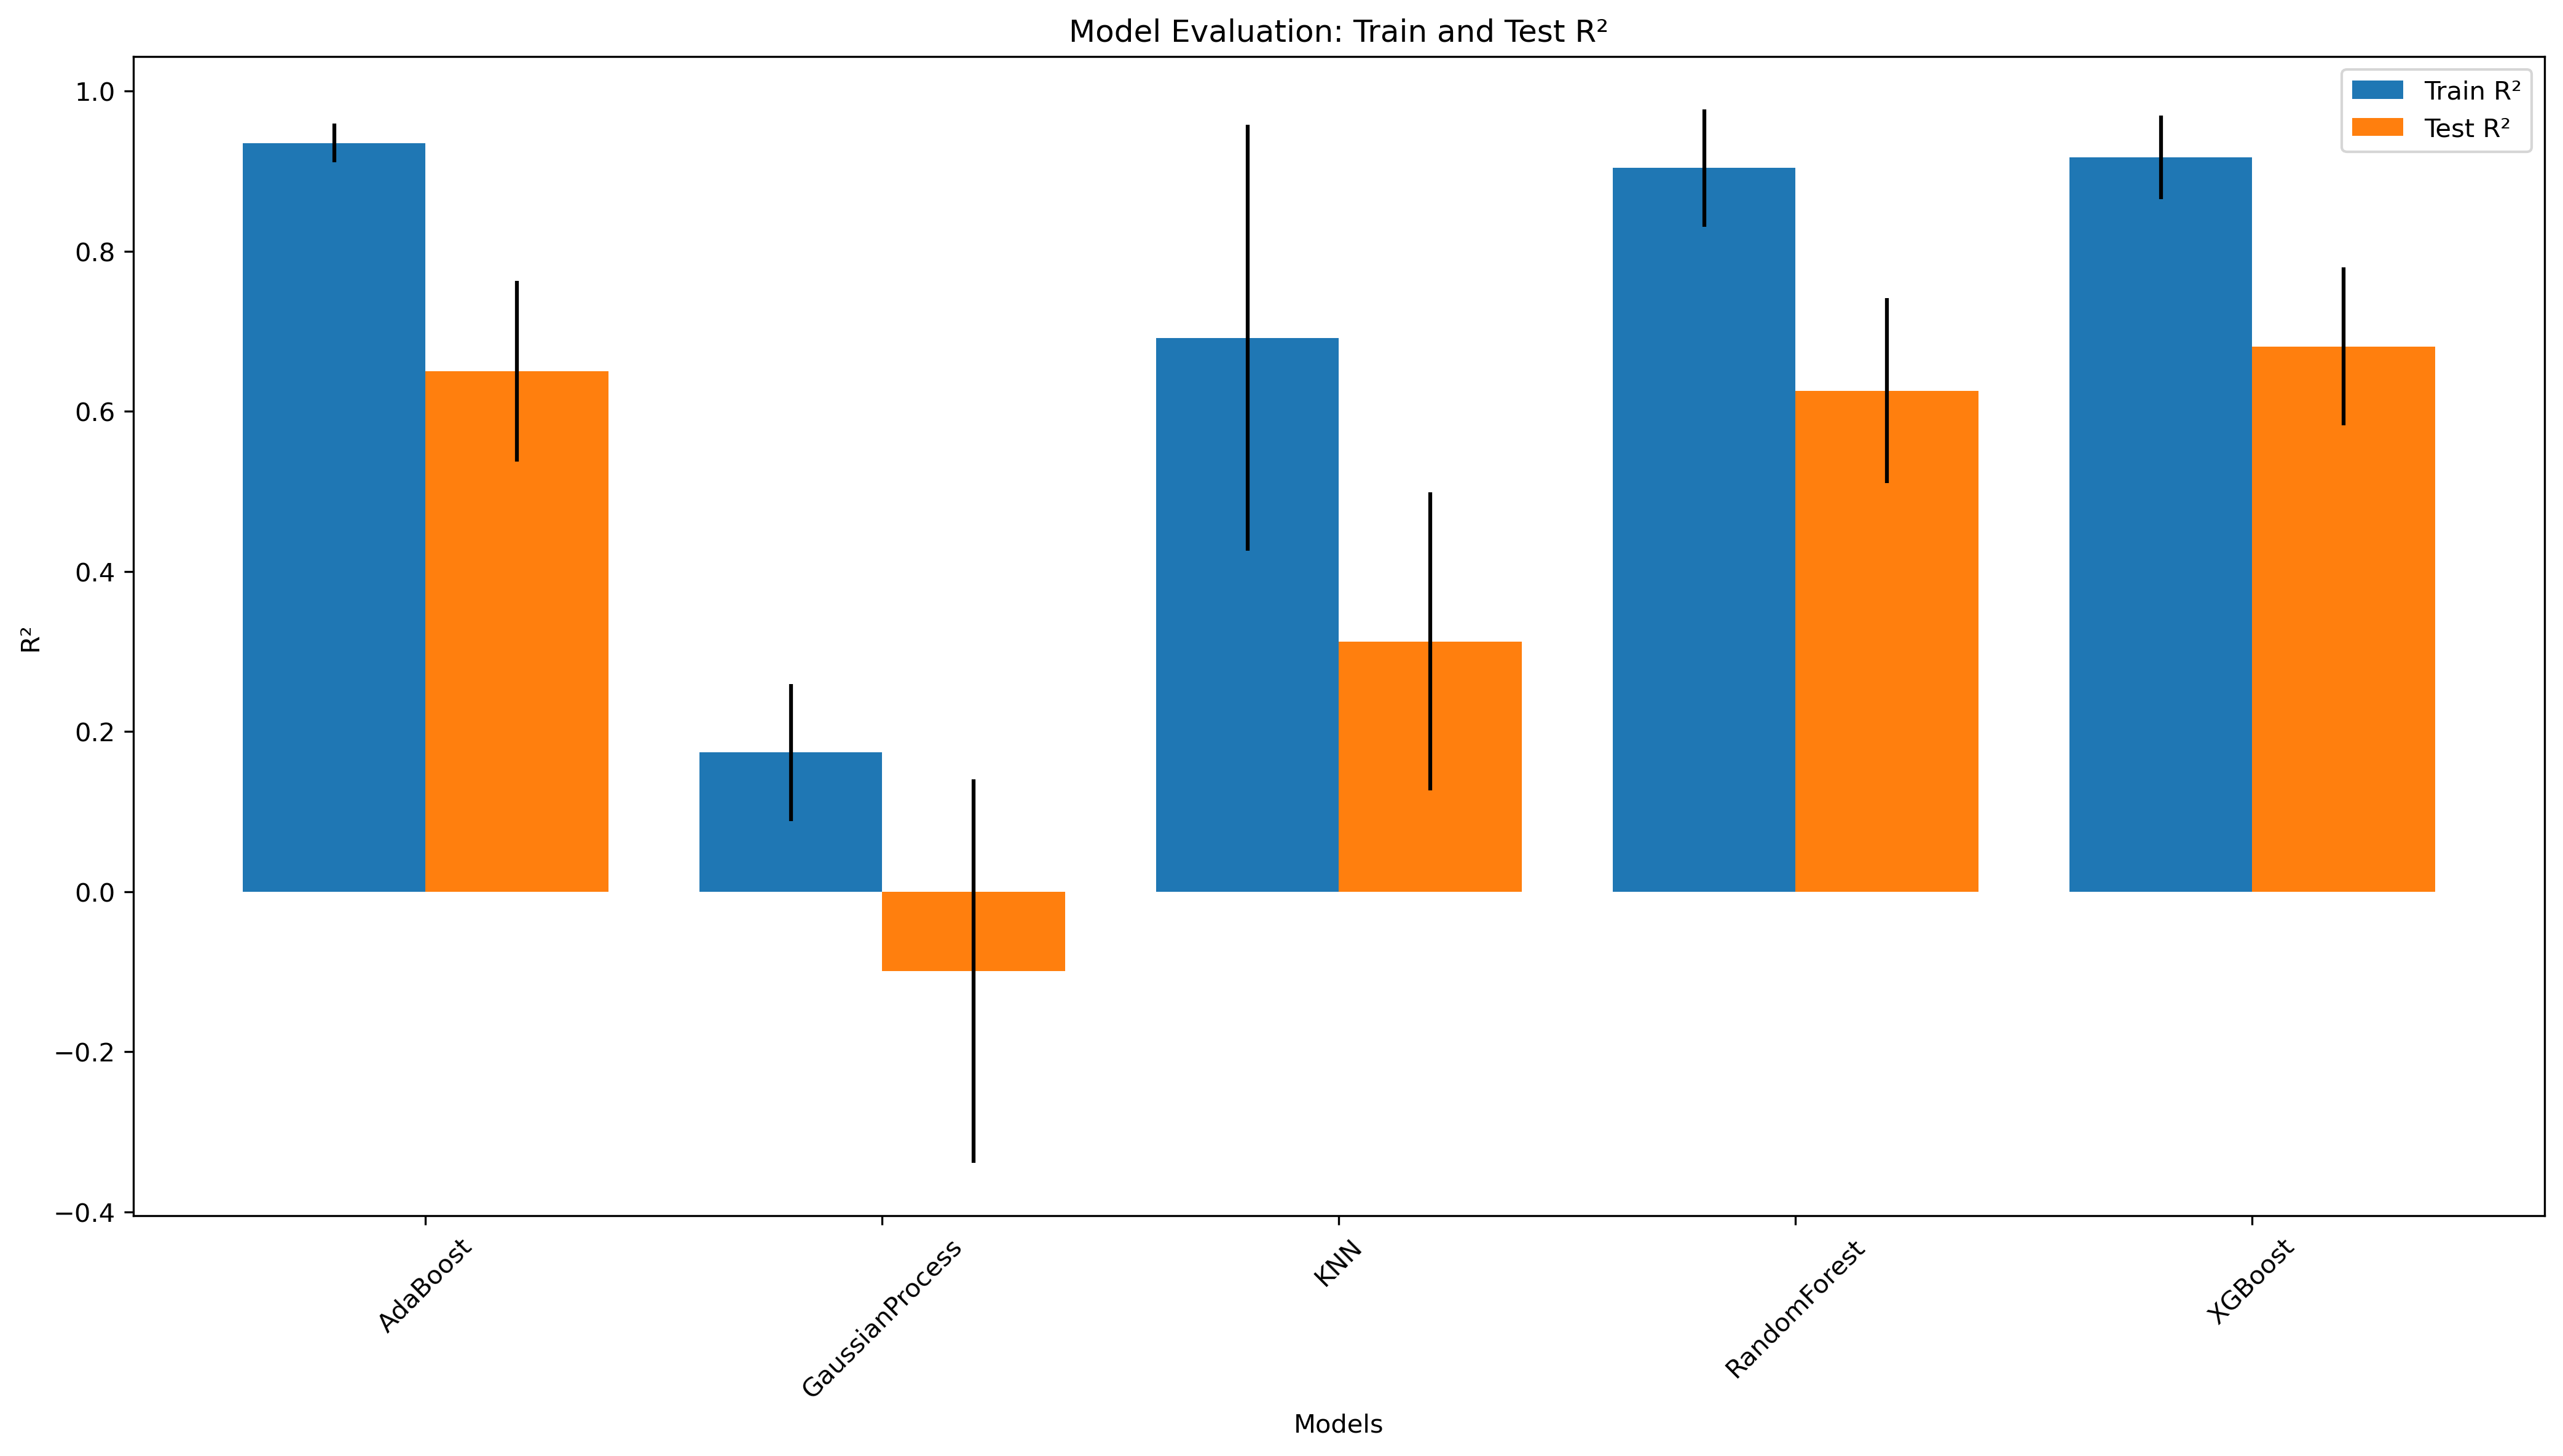

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 读取数据
data = pd.read_excel('HV.xlsx')
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

# 初始化存储结果的数组
results = []

# 随机种子
seeds = range(100)

# 模型列表
models = {
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'XGBoost': xgb.sklearn.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3),
    'GaussianProcess': GaussianProcessRegressor(kernel=C(0.1, (0.001, 0.1)) * RBF(0.5, (1e-4, 10)), n_restarts_optimizer=10, alpha=0.1),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42)
}

# 超参数搜索参数
param_grids = {
    'KNN': {'n_neighbors': np.arange(1, 100)},
    'RandomForest': {
        'n_estimators': [50, 75, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [3, 4, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True]
    },
    'XGBoost': {
        'learning_rate': [0.1],
        'n_estimators': [50, 75, 100],
        'max_depth': [1, 2, 3]
    }
}

# 遍历随机种子
for seed in seeds:
    # 切分数据
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=seed)
    
    for model_name, model in models.items():
        # 如果模型有超参数搜索
        if model_name in param_grids:
            grid = GridSearchCV(model, param_grids[model_name], cv=10, n_jobs=-1)
            model = grid.fit(x_train, y_train)
            best_params = model.best_params_
        else:
            model.fit(x_train, y_train)
            best_params = {}
        
        # 评估模型
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # 存储结果
        results.append({
            'Seed': seed,
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2,
            'Best_Params': best_params
        })

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 保存到Excel
results_df.to_excel('0.3hvmodel_evaluation.xlsx', index=False)

# 计算平均值和标准差
summary_df = results_df.groupby('Model').agg({
    'Train_R2': ['mean', 'std'],
    'Test_R2': ['mean', 'std']
}).reset_index()

summary_df.columns = ['Model', 'Train_R2_Mean', 'Train_R2_Std', 'Test_R2_Mean', 'Test_R2_Std']

# 输出平均值和标准差
print(summary_df)

# 可视化结果
plt.figure(dpi=300, figsize=(14, 8))

# 训练集R²
plt.bar(np.arange(len(summary_df)) - 0.2, summary_df['Train_R2_Mean'], yerr=summary_df['Train_R2_Std'], width=0.4, label='Train R²')
# 测试集R²
plt.bar(np.arange(len(summary_df)) + 0.2, summary_df['Test_R2_Mean'], yerr=summary_df['Test_R2_Std'], width=0.4, label='Test R²')

plt.xlabel('Models')
plt.ylabel('R²')
plt.title('Model Evaluation: Train and Test R²')
plt.xticks(ticks=np.arange(len(summary_df)), labels=summary_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
#0.4

             Model  Train_R2_Mean  Train_R2_Std  Test_R2_Mean  Test_R2_Std
0         AdaBoost       0.919702      0.023434      0.688906     0.088031
1  GaussianProcess       0.257165      0.097605      0.040589     0.181602
2              KNN       0.801906      0.190032      0.423992     0.152710
3     RandomForest       0.938504      0.046206      0.693809     0.094395
4          XGBoost       0.914019      0.057342      0.716326     0.091605


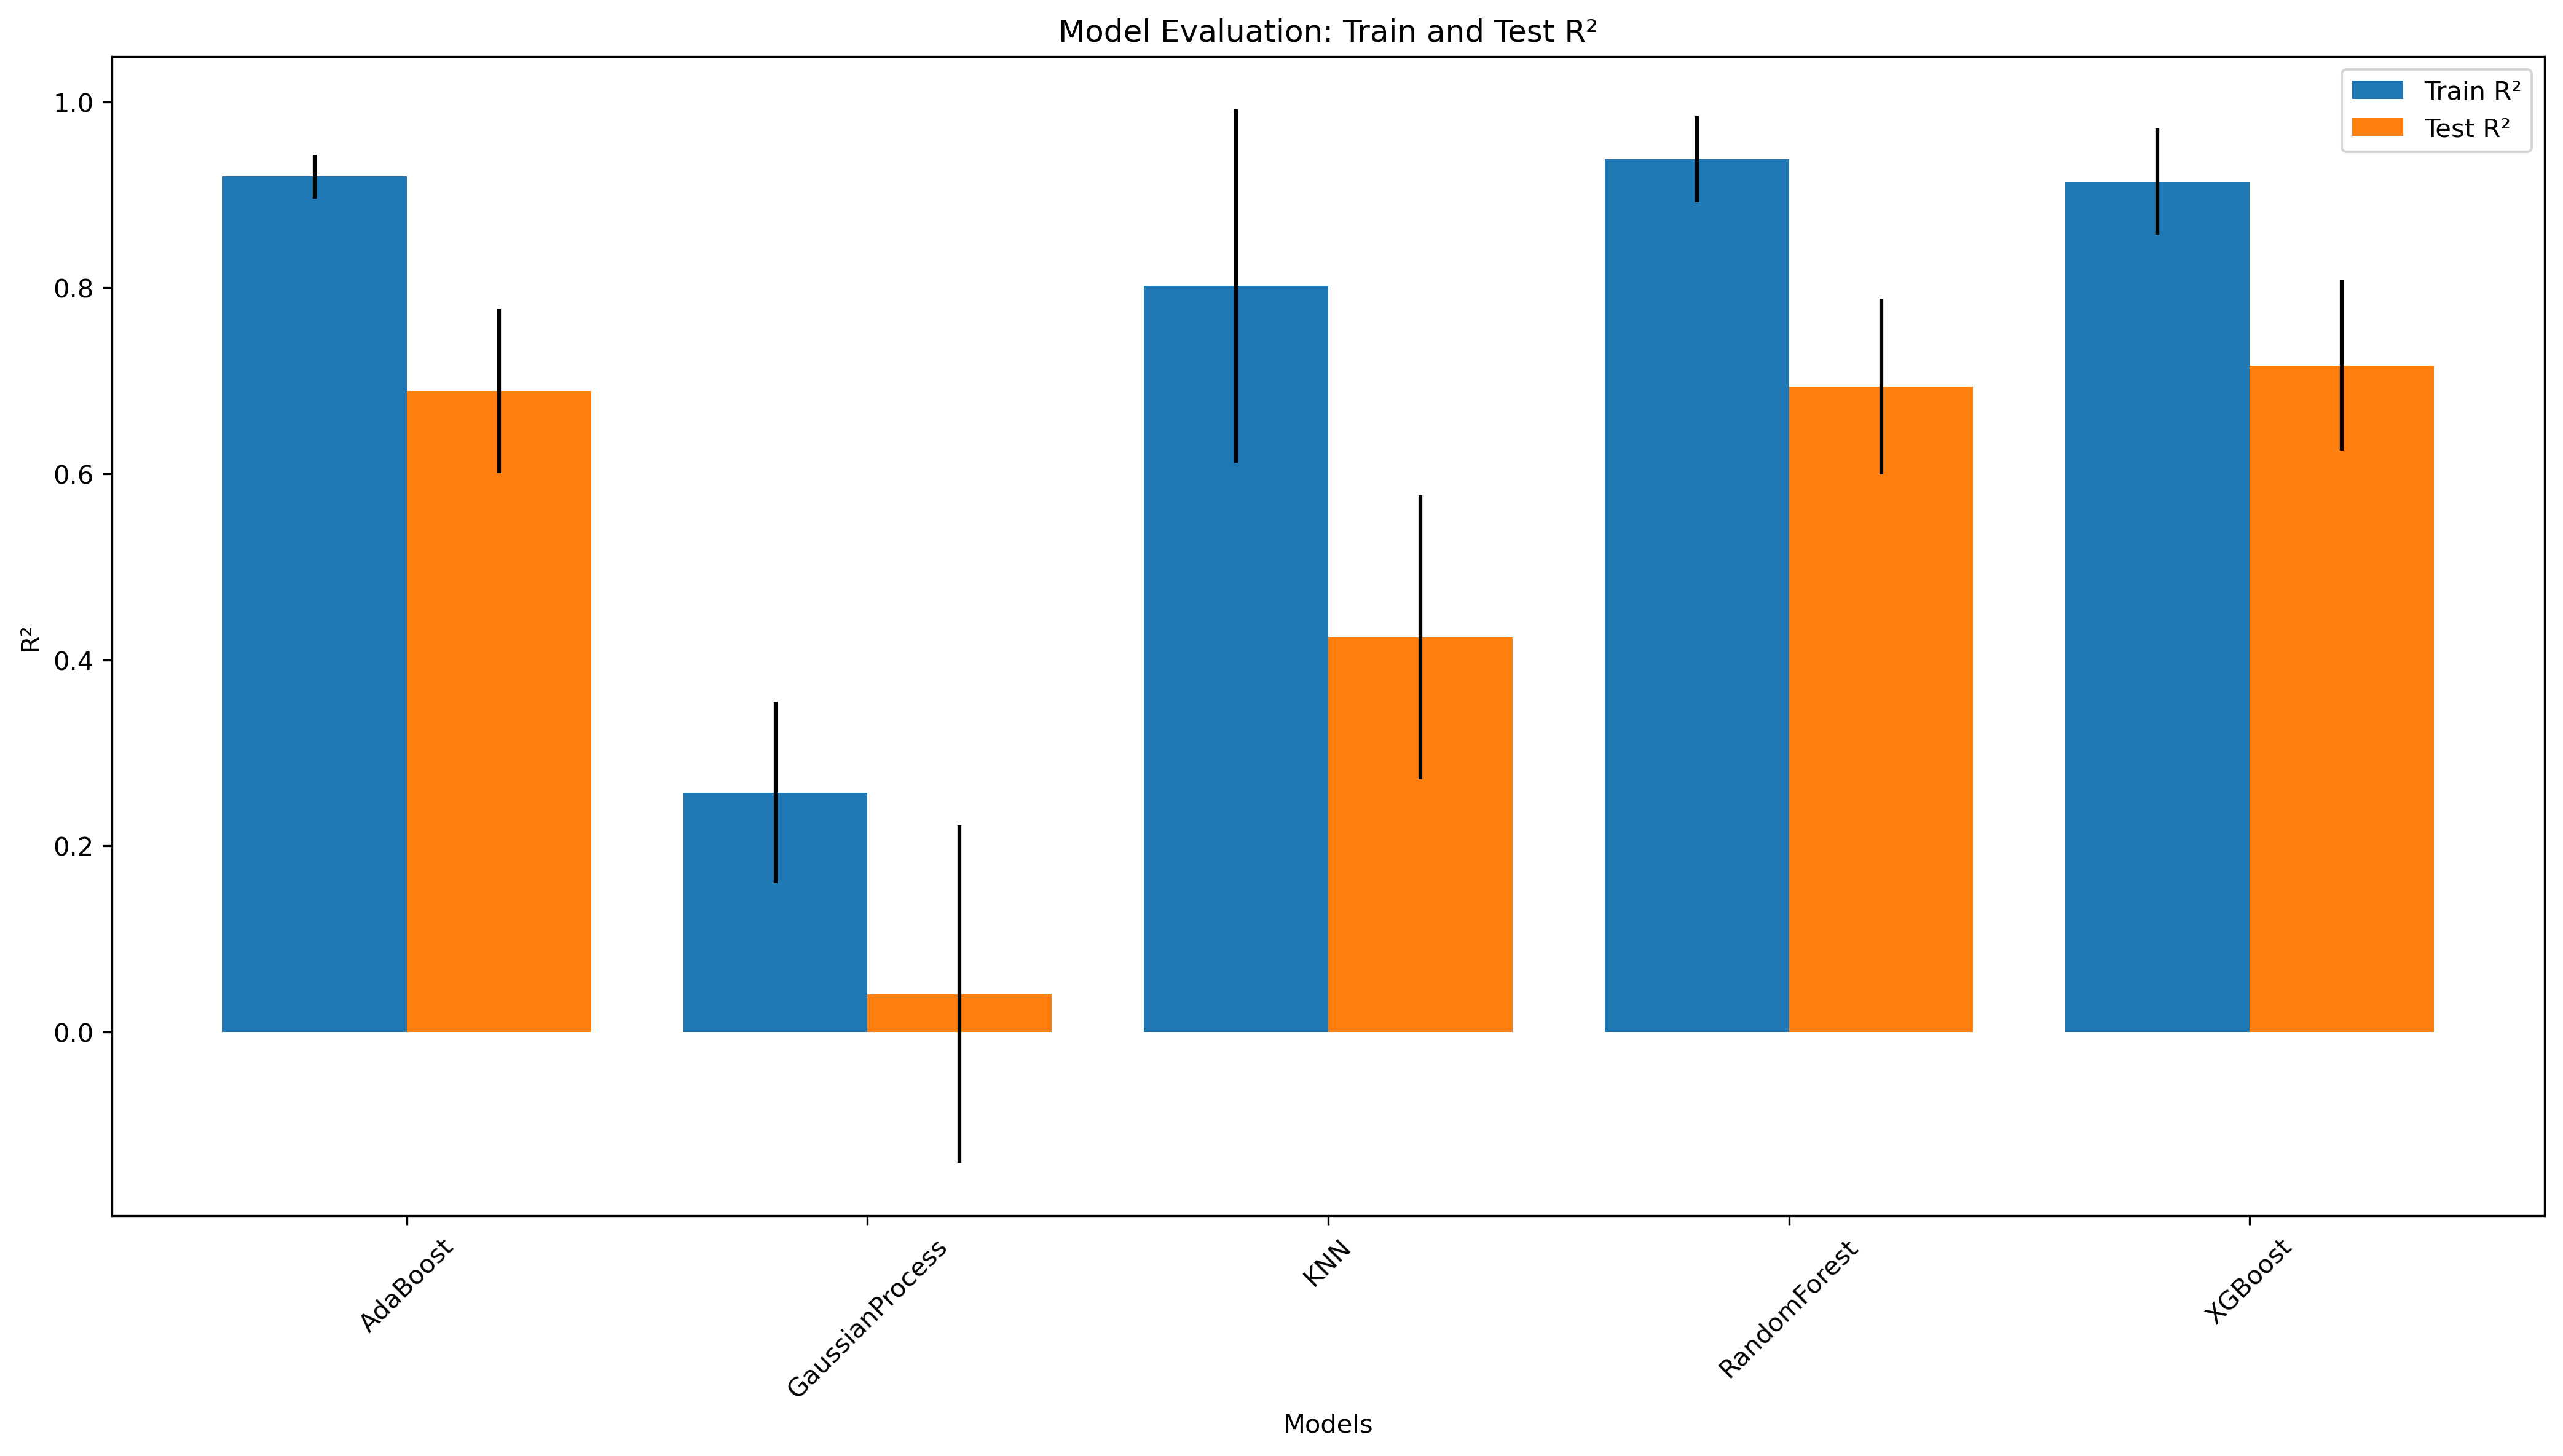

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 读取数据
data = pd.read_excel('HV.xlsx')
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

# 初始化存储结果的数组
results = []

# 随机种子
seeds = range(100)

# 模型列表
models = {
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'XGBoost': xgb.sklearn.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3),
    'GaussianProcess': GaussianProcessRegressor(kernel=C(0.1, (0.001, 0.1)) * RBF(0.5, (1e-4, 10)), n_restarts_optimizer=10, alpha=0.1),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42)
}

# 超参数搜索参数
param_grids = {
    'KNN': {'n_neighbors': np.arange(1, 100)},
    'RandomForest': {
        'n_estimators': [50, 75, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [3, 4, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True]
    },
    'XGBoost': {
        'learning_rate': [0.1],
        'n_estimators': [50, 75, 100],
        'max_depth': [1, 2, 3]
    }
}

# 遍历随机种子
for seed in seeds:
    # 切分数据
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.6, random_state=seed)
    
    for model_name, model in models.items():
        # 如果模型有超参数搜索
        if model_name in param_grids:
            grid = GridSearchCV(model, param_grids[model_name], cv=10, n_jobs=-1)
            model = grid.fit(x_train, y_train)
            best_params = model.best_params_
        else:
            model.fit(x_train, y_train)
            best_params = {}
        
        # 评估模型
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # 存储结果
        results.append({
            'Seed': seed,
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2,
            'Best_Params': best_params
        })

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 保存到Excel
results_df.to_excel('0.4hvmodel_evaluation.xlsx', index=False)

# 计算平均值和标准差
summary_df = results_df.groupby('Model').agg({
    'Train_R2': ['mean', 'std'],
    'Test_R2': ['mean', 'std']
}).reset_index()

summary_df.columns = ['Model', 'Train_R2_Mean', 'Train_R2_Std', 'Test_R2_Mean', 'Test_R2_Std']

# 输出平均值和标准差
print(summary_df)

# 可视化结果
plt.figure(dpi=300, figsize=(14, 8))

# 训练集R²
plt.bar(np.arange(len(summary_df)) - 0.2, summary_df['Train_R2_Mean'], yerr=summary_df['Train_R2_Std'], width=0.4, label='Train R²')
# 测试集R²
plt.bar(np.arange(len(summary_df)) + 0.2, summary_df['Test_R2_Mean'], yerr=summary_df['Test_R2_Std'], width=0.4, label='Test R²')

plt.xlabel('Models')
plt.ylabel('R²')
plt.title('Model Evaluation: Train and Test R²')
plt.xticks(ticks=np.arange(len(summary_df)), labels=summary_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [5]:
#0.5

             Model  Train_R2_Mean  Train_R2_Std  Test_R2_Mean  Test_R2_Std
0         AdaBoost       0.903170      0.025171      0.715144     0.063835
1  GaussianProcess       0.327634      0.109309      0.168201     0.144108
2              KNN       0.862420      0.137382      0.547345     0.129682
3     RandomForest       0.943479      0.039998      0.743050     0.071642
4          XGBoost       0.914214      0.042032      0.756901     0.063111


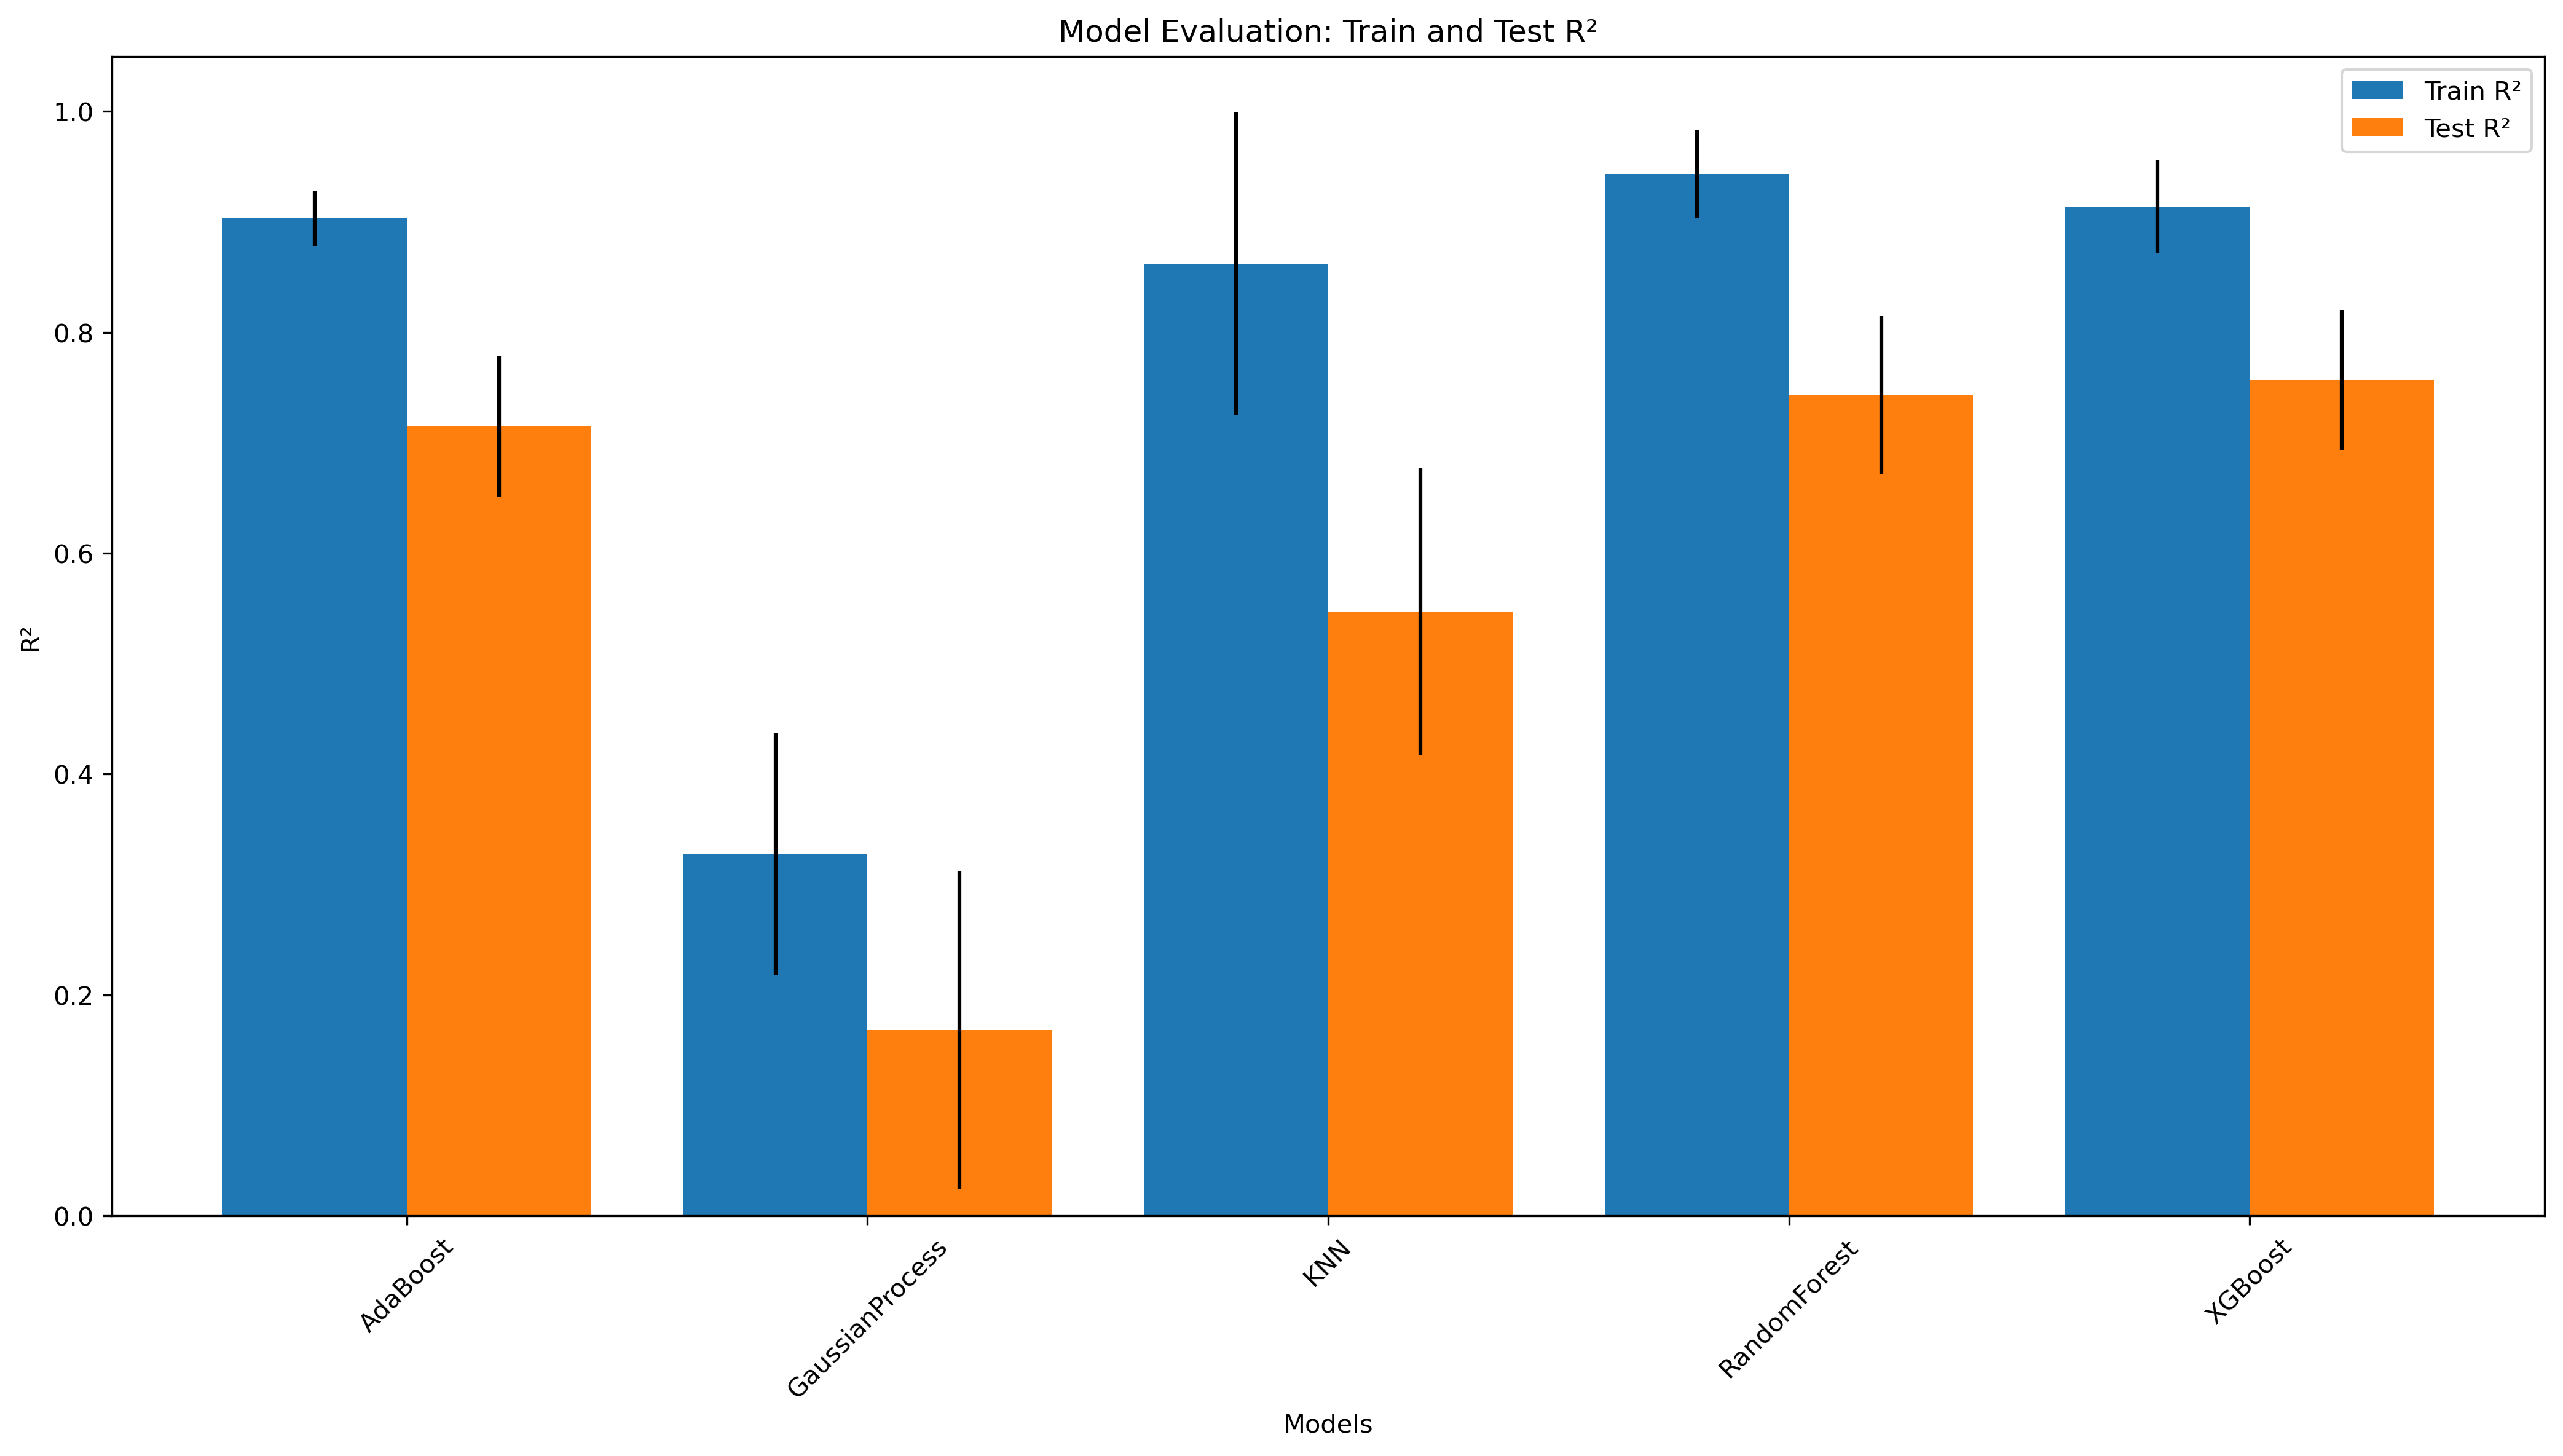

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 读取数据
data = pd.read_excel('HV.xlsx')
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

# 初始化存储结果的数组
results = []

# 随机种子
seeds = range(100)

# 模型列表
models = {
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'XGBoost': xgb.sklearn.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3),
    'GaussianProcess': GaussianProcessRegressor(kernel=C(0.1, (0.001, 0.1)) * RBF(0.5, (1e-4, 10)), n_restarts_optimizer=10, alpha=0.1),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42)
}

# 超参数搜索参数
param_grids = {
    'KNN': {'n_neighbors': np.arange(1, 100)},
    'RandomForest': {
        'n_estimators': [50, 75, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [3, 4, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True]
    },
    'XGBoost': {
        'learning_rate': [0.1],
        'n_estimators': [50, 75, 100],
        'max_depth': [1, 2, 3]
    }
}

# 遍历随机种子
for seed in seeds:
    # 切分数据
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=seed)
    
    for model_name, model in models.items():
        # 如果模型有超参数搜索
        if model_name in param_grids:
            grid = GridSearchCV(model, param_grids[model_name], cv=10, n_jobs=-1)
            model = grid.fit(x_train, y_train)
            best_params = model.best_params_
        else:
            model.fit(x_train, y_train)
            best_params = {}
        
        # 评估模型
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # 存储结果
        results.append({
            'Seed': seed,
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2,
            'Best_Params': best_params
        })

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 保存到Excel
results_df.to_excel('0.5hvmodel_evaluation.xlsx', index=False)

# 计算平均值和标准差
summary_df = results_df.groupby('Model').agg({
    'Train_R2': ['mean', 'std'],
    'Test_R2': ['mean', 'std']
}).reset_index()

summary_df.columns = ['Model', 'Train_R2_Mean', 'Train_R2_Std', 'Test_R2_Mean', 'Test_R2_Std']

# 输出平均值和标准差
print(summary_df)

# 可视化结果
plt.figure(dpi=300, figsize=(14, 8))

# 训练集R²
plt.bar(np.arange(len(summary_df)) - 0.2, summary_df['Train_R2_Mean'], yerr=summary_df['Train_R2_Std'], width=0.4, label='Train R²')
# 测试集R²
plt.bar(np.arange(len(summary_df)) + 0.2, summary_df['Test_R2_Mean'], yerr=summary_df['Test_R2_Std'], width=0.4, label='Test R²')

plt.xlabel('Models')
plt.ylabel('R²')
plt.title('Model Evaluation: Train and Test R²')
plt.xticks(ticks=np.arange(len(summary_df)), labels=summary_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
#0.6

             Model  Train_R2_Mean  Train_R2_Std  Test_R2_Mean  Test_R2_Std
0         AdaBoost       0.891804      0.024702      0.717252     0.077872
1  GaussianProcess       0.426366      0.111552      0.277825     0.146533
2              KNN       0.905035      0.086693      0.591178     0.136552
3     RandomForest       0.956223      0.019945      0.764683     0.069093
4          XGBoost       0.928774      0.035678      0.763878     0.063397


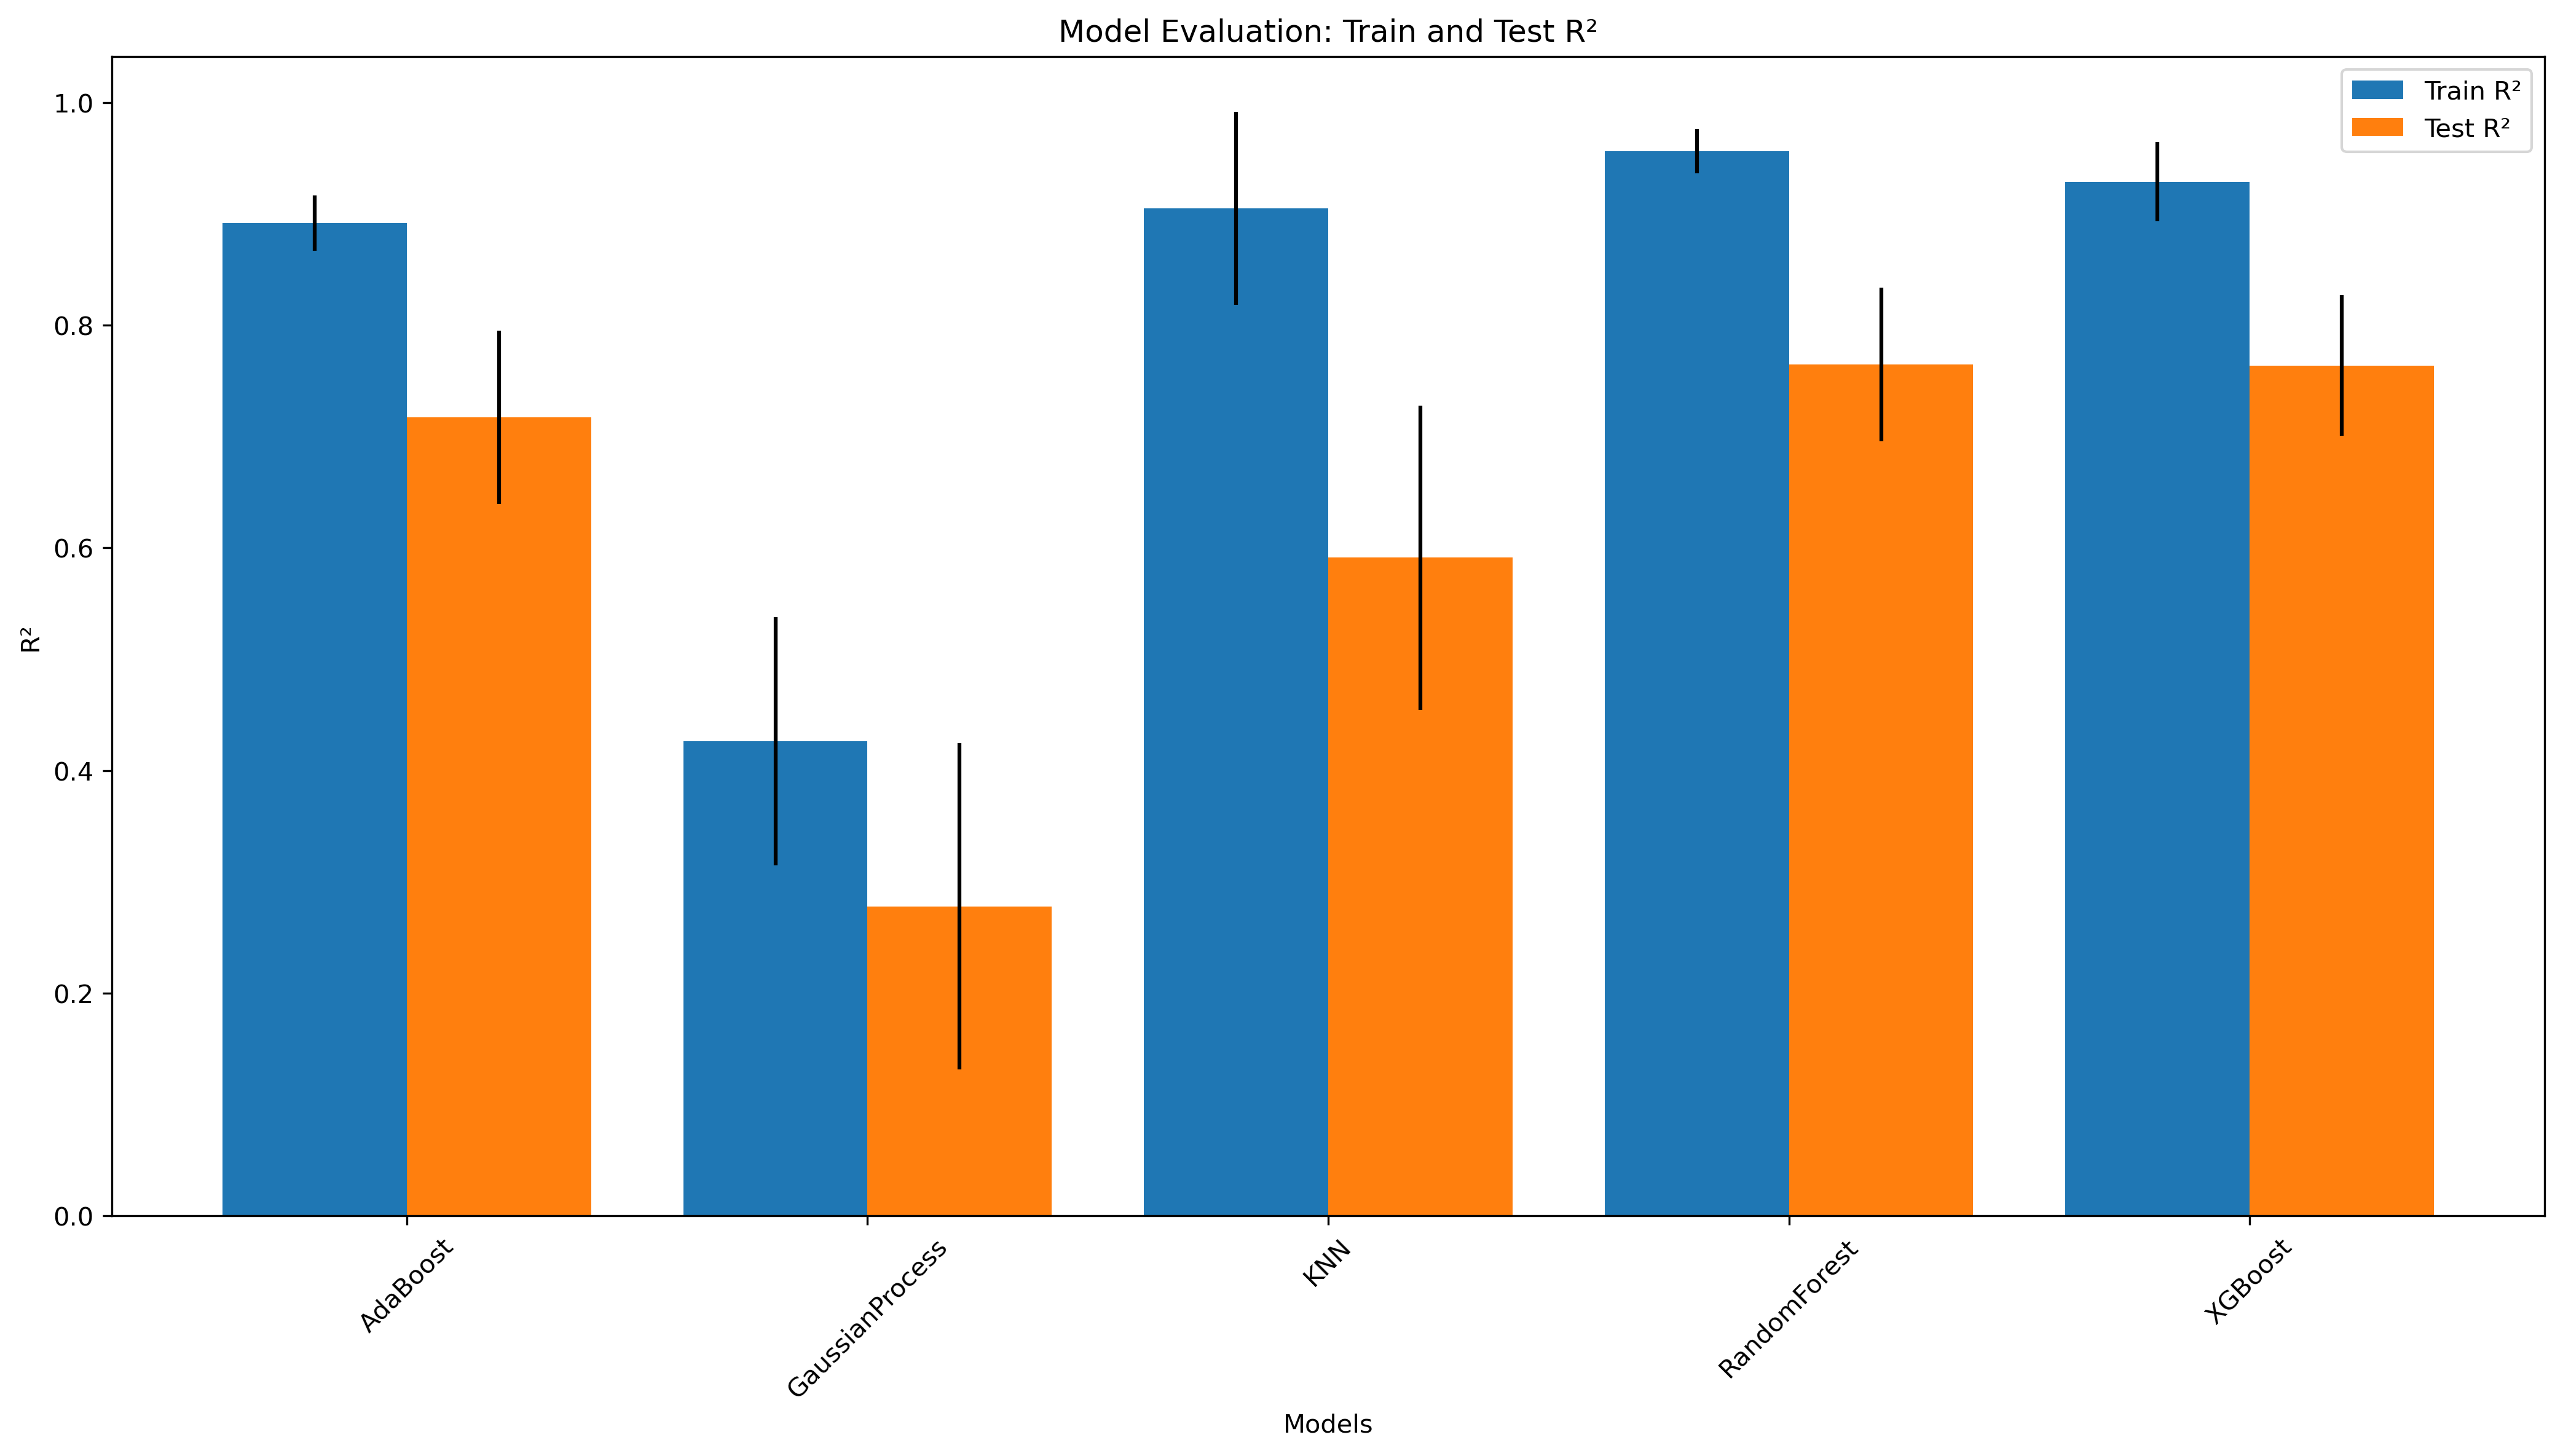

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 读取数据
data = pd.read_excel('HV.xlsx')
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

# 初始化存储结果的数组
results = []

# 随机种子
seeds = range(100)

# 模型列表
models = {
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'XGBoost': xgb.sklearn.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3),
    'GaussianProcess': GaussianProcessRegressor(kernel=C(0.1, (0.001, 0.1)) * RBF(0.5, (1e-4, 10)), n_restarts_optimizer=10, alpha=0.1),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42)
}

# 超参数搜索参数
param_grids = {
    'KNN': {'n_neighbors': np.arange(1, 100)},
    'RandomForest': {
        'n_estimators': [50, 75, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [3, 4, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True]
    },
    'XGBoost': {
        'learning_rate': [0.1],
        'n_estimators': [50, 75, 100],
        'max_depth': [1, 2, 3]
    }
}

# 遍历随机种子
for seed in seeds:
    # 切分数据
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=seed)
    
    for model_name, model in models.items():
        # 如果模型有超参数搜索
        if model_name in param_grids:
            grid = GridSearchCV(model, param_grids[model_name], cv=10, n_jobs=-1)
            model = grid.fit(x_train, y_train)
            best_params = model.best_params_
        else:
            model.fit(x_train, y_train)
            best_params = {}
        
        # 评估模型
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # 存储结果
        results.append({
            'Seed': seed,
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2,
            'Best_Params': best_params
        })

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 保存到Excel
results_df.to_excel('0.6hvmodel_evaluation.xlsx', index=False)

# 计算平均值和标准差
summary_df = results_df.groupby('Model').agg({
    'Train_R2': ['mean', 'std'],
    'Test_R2': ['mean', 'std']
}).reset_index()

summary_df.columns = ['Model', 'Train_R2_Mean', 'Train_R2_Std', 'Test_R2_Mean', 'Test_R2_Std']

# 输出平均值和标准差
print(summary_df)

# 可视化结果
plt.figure(dpi=300, figsize=(14, 8))

# 训练集R²
plt.bar(np.arange(len(summary_df)) - 0.2, summary_df['Train_R2_Mean'], yerr=summary_df['Train_R2_Std'], width=0.4, label='Train R²')
# 测试集R²
plt.bar(np.arange(len(summary_df)) + 0.2, summary_df['Test_R2_Mean'], yerr=summary_df['Test_R2_Std'], width=0.4, label='Test R²')

plt.xlabel('Models')
plt.ylabel('R²')
plt.title('Model Evaluation: Train and Test R²')
plt.xticks(ticks=np.arange(len(summary_df)), labels=summary_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
#0.7

             Model  Train_R2_Mean  Train_R2_Std  Test_R2_Mean  Test_R2_Std
0         AdaBoost       0.884514      0.021280      0.714892     0.089665
1  GaussianProcess       0.516560      0.066721      0.376972     0.136900
2              KNN       0.927373      0.063285      0.633205     0.119903
3     RandomForest       0.960333      0.011065      0.775084     0.073346
4          XGBoost       0.930585      0.033199      0.766923     0.067458


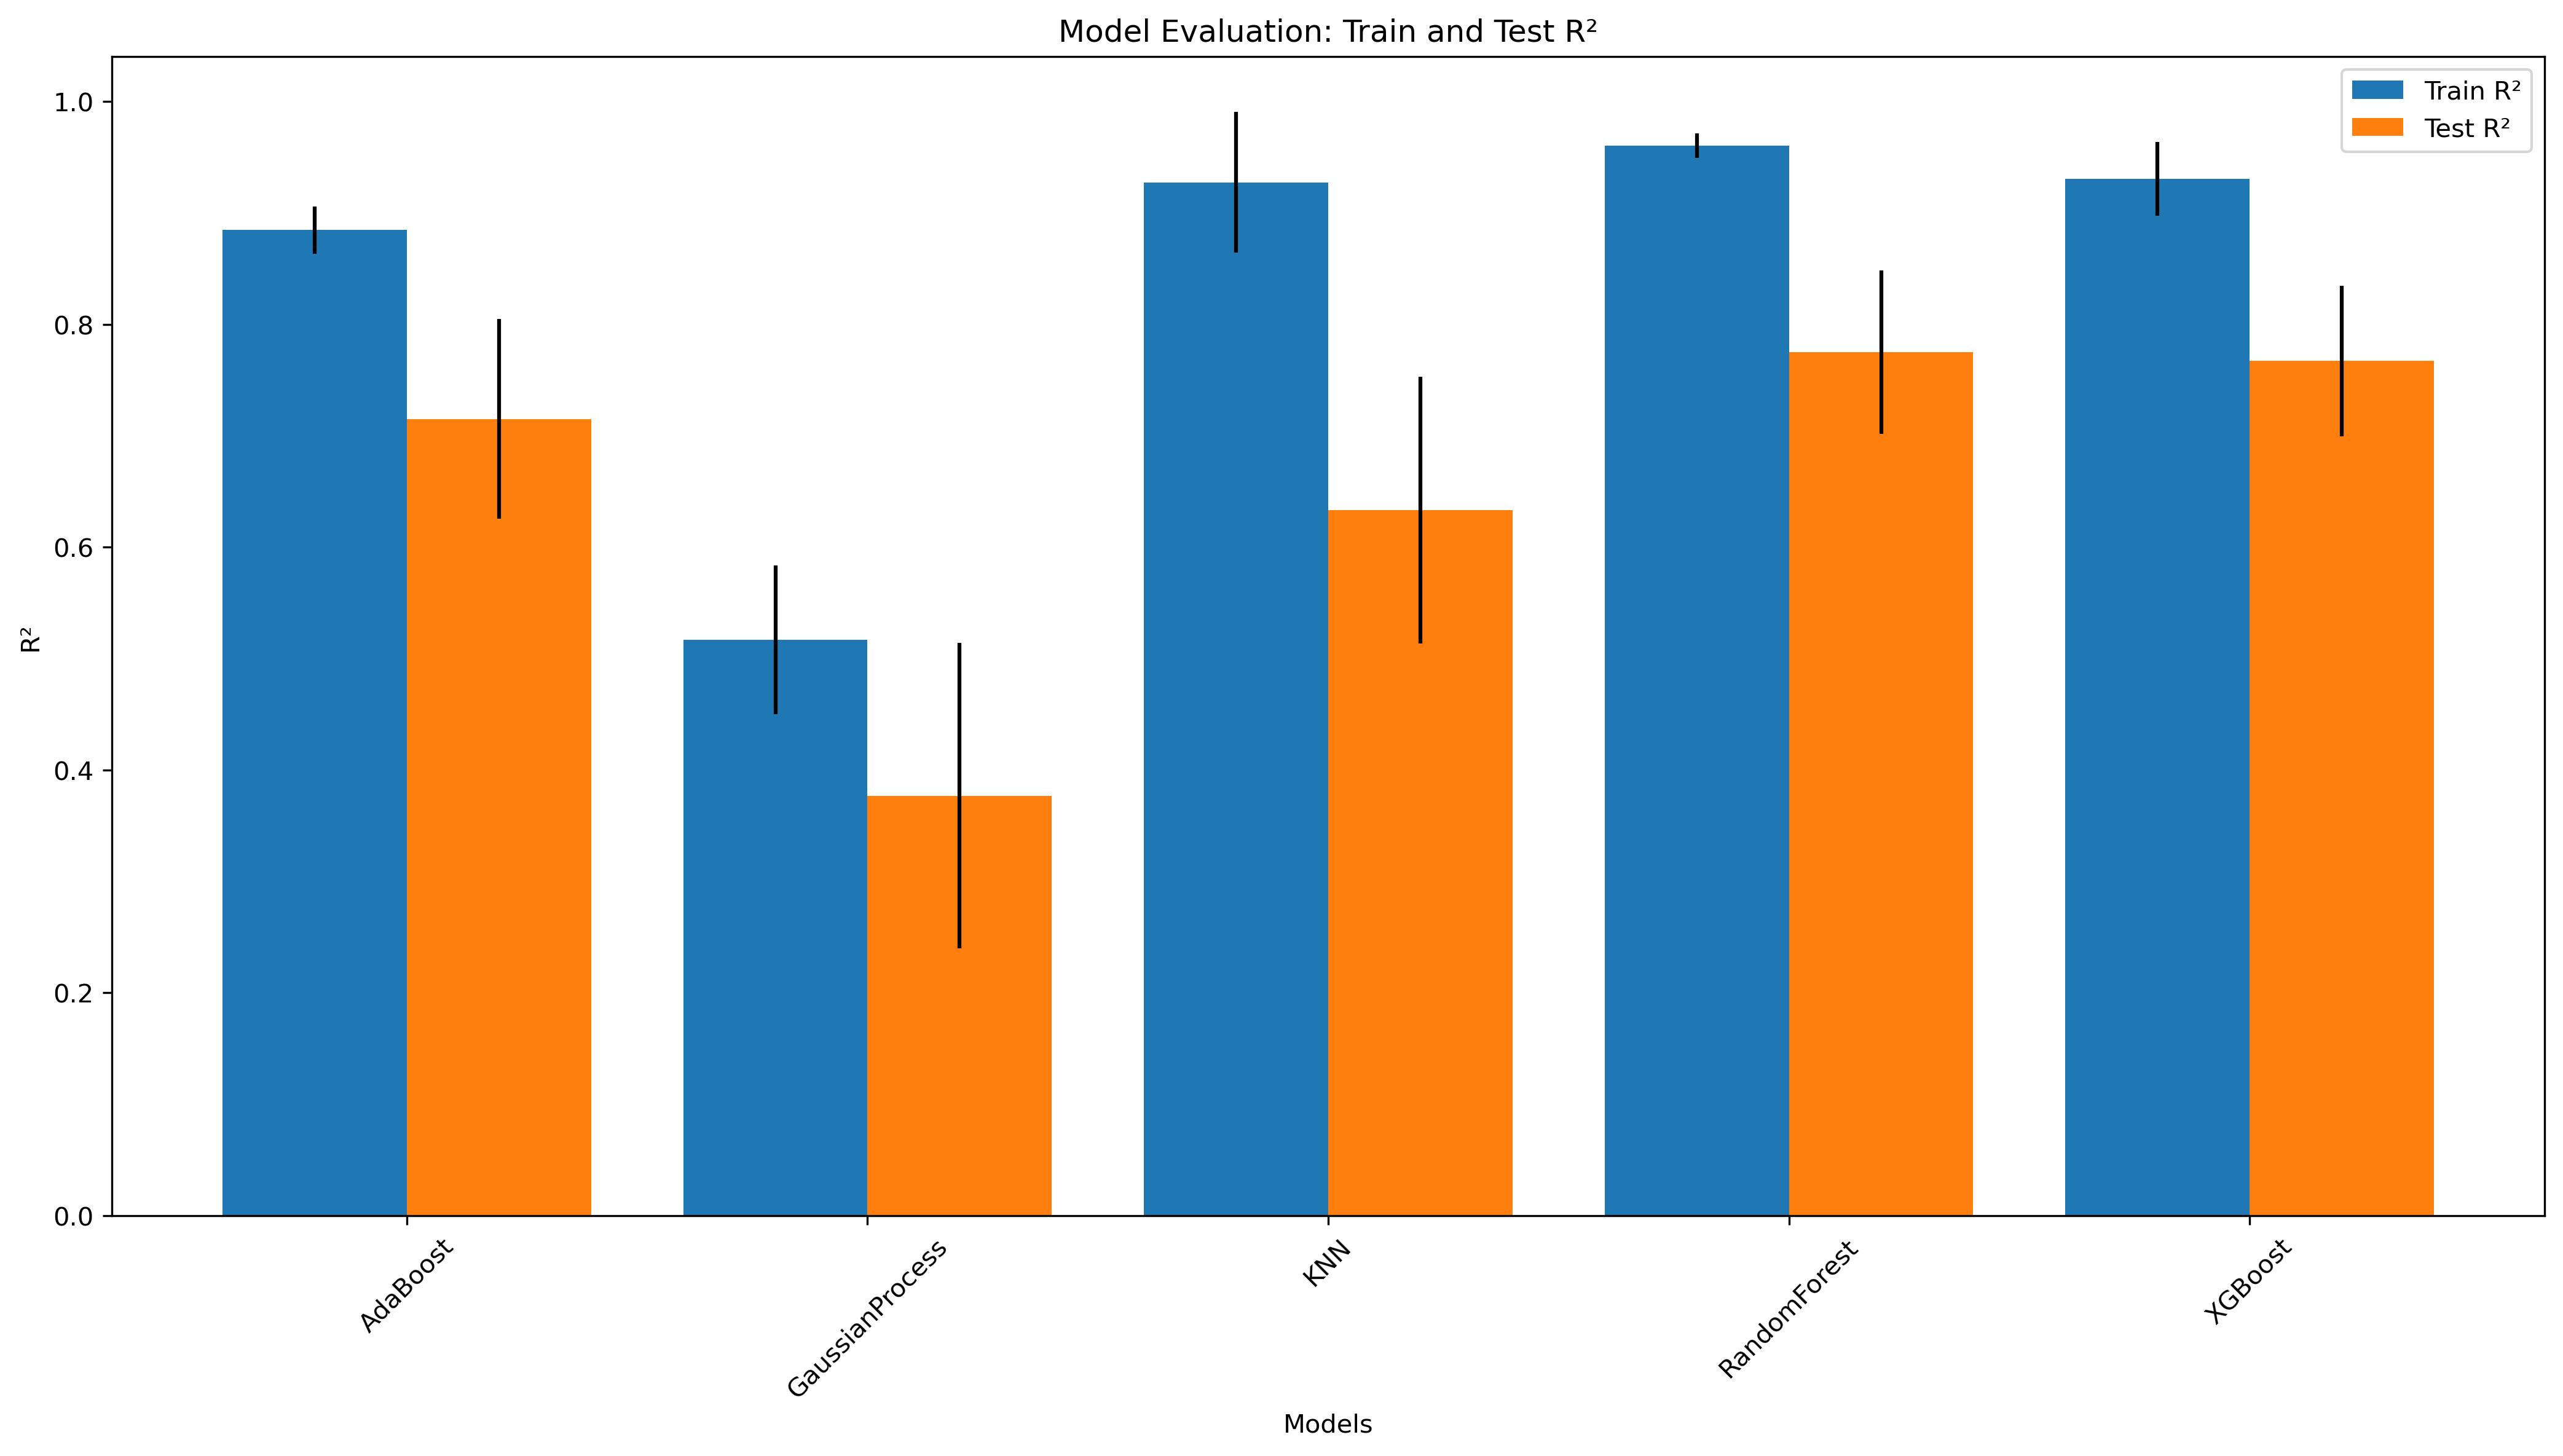

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 读取数据
data = pd.read_excel('HV.xlsx')
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

# 初始化存储结果的数组
results = []

# 随机种子
seeds = range(100)

# 模型列表
models = {
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'XGBoost': xgb.sklearn.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3),
    'GaussianProcess': GaussianProcessRegressor(kernel=C(0.1, (0.001, 0.1)) * RBF(0.5, (1e-4, 10)), n_restarts_optimizer=10, alpha=0.1),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42)
}

# 超参数搜索参数
param_grids = {
    'KNN': {'n_neighbors': np.arange(1, 100)},
    'RandomForest': {
        'n_estimators': [50, 75, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [3, 4, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True]
    },
    'XGBoost': {
        'learning_rate': [0.1],
        'n_estimators': [50, 75, 100],
        'max_depth': [1, 2, 3]
    }
}

# 遍历随机种子
for seed in seeds:
    # 切分数据
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)
    
    for model_name, model in models.items():
        # 如果模型有超参数搜索
        if model_name in param_grids:
            grid = GridSearchCV(model, param_grids[model_name], cv=10, n_jobs=-1)
            model = grid.fit(x_train, y_train)
            best_params = model.best_params_
        else:
            model.fit(x_train, y_train)
            best_params = {}
        
        # 评估模型
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # 存储结果
        results.append({
            'Seed': seed,
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2,
            'Best_Params': best_params
        })

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 保存到Excel
results_df.to_excel('0.7hvmodel_evaluation.xlsx', index=False)

# 计算平均值和标准差
summary_df = results_df.groupby('Model').agg({
    'Train_R2': ['mean', 'std'],
    'Test_R2': ['mean', 'std']
}).reset_index()

summary_df.columns = ['Model', 'Train_R2_Mean', 'Train_R2_Std', 'Test_R2_Mean', 'Test_R2_Std']

# 输出平均值和标准差
print(summary_df)

# 可视化结果
plt.figure(dpi=300, figsize=(14, 8))

# 训练集R²
plt.bar(np.arange(len(summary_df)) - 0.2, summary_df['Train_R2_Mean'], yerr=summary_df['Train_R2_Std'], width=0.4, label='Train R²')
# 测试集R²
plt.bar(np.arange(len(summary_df)) + 0.2, summary_df['Test_R2_Mean'], yerr=summary_df['Test_R2_Std'], width=0.4, label='Test R²')

plt.xlabel('Models')
plt.ylabel('R²')
plt.title('Model Evaluation: Train and Test R²')
plt.xticks(ticks=np.arange(len(summary_df)), labels=summary_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
#0.8

             Model  Train_R2_Mean  Train_R2_Std  Test_R2_Mean  Test_R2_Std
0         AdaBoost       0.872767      0.020682      0.740309     0.092887
1  GaussianProcess       0.553676      0.045488      0.450448     0.112984
2              KNN       0.928148      0.044441      0.690302     0.098010
3     RandomForest       0.961758      0.007102      0.800853     0.064802
4          XGBoost       0.937543      0.028051      0.803404     0.072303


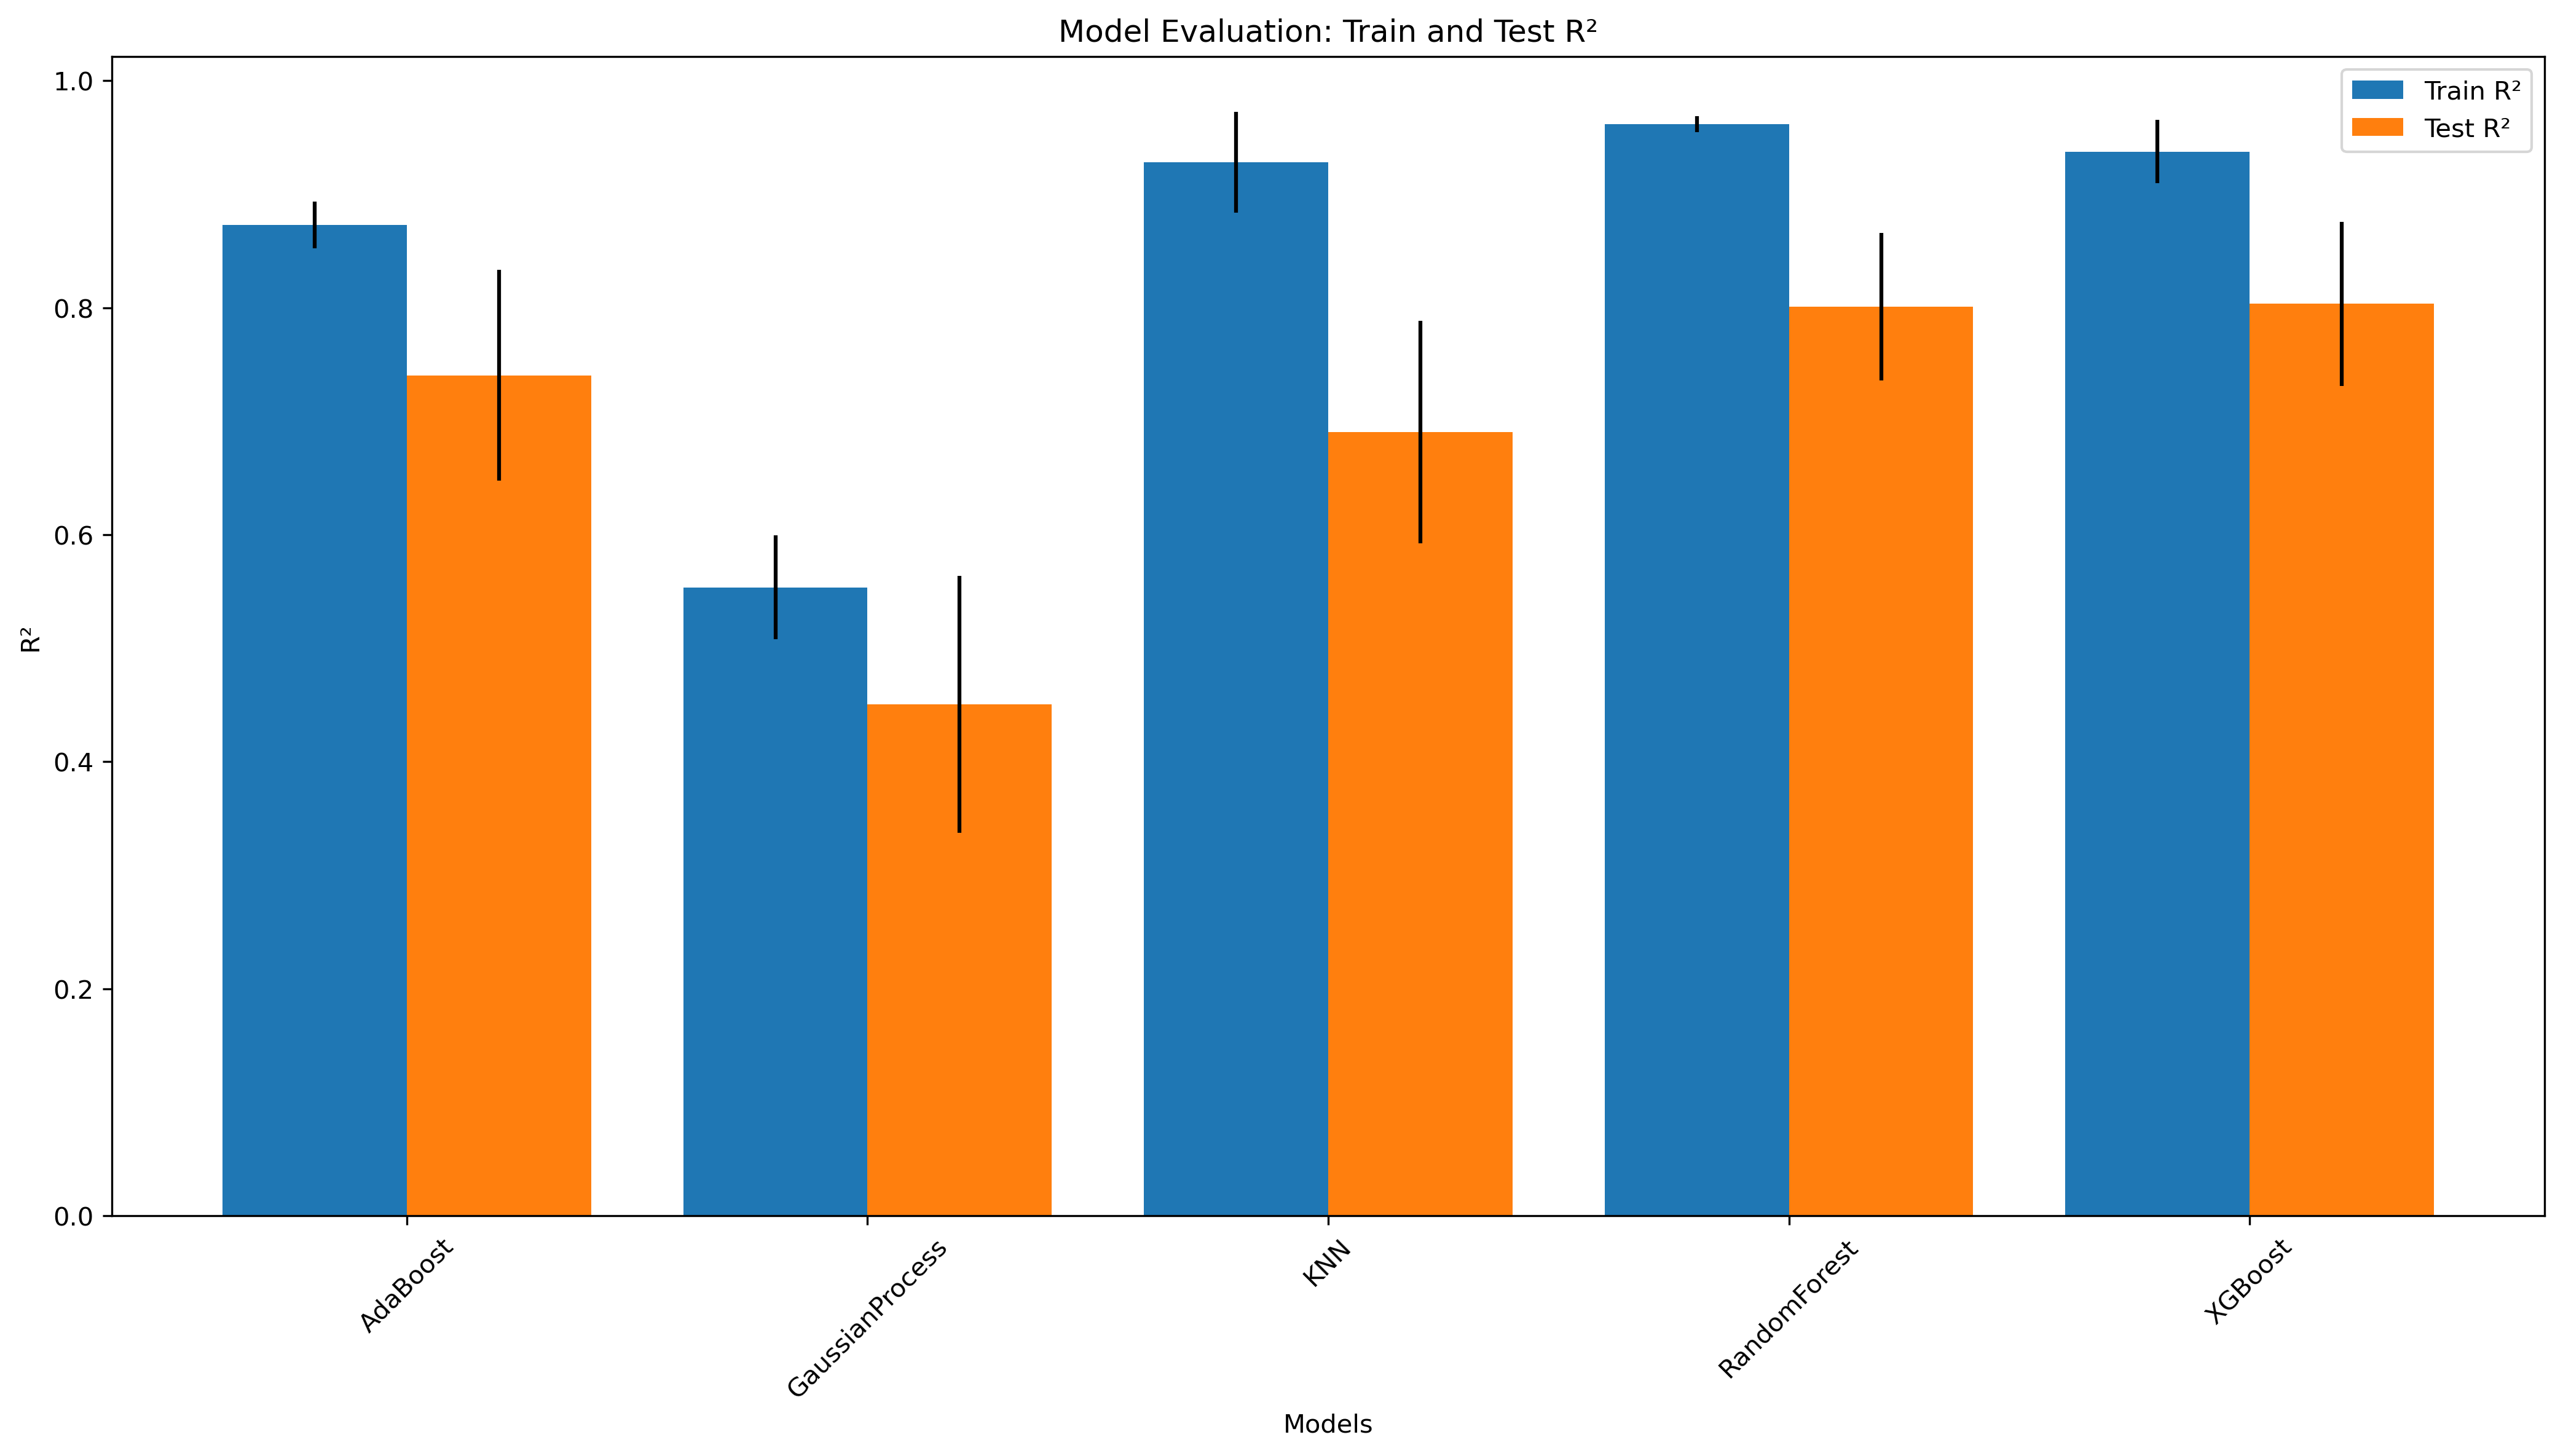

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 读取数据
data = pd.read_excel('HV.xlsx')
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

# 初始化存储结果的数组
results = []

# 随机种子
seeds = range(100)

# 模型列表
models = {
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'XGBoost': xgb.sklearn.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3),
    'GaussianProcess': GaussianProcessRegressor(kernel=C(0.1, (0.001, 0.1)) * RBF(0.5, (1e-4, 10)), n_restarts_optimizer=10, alpha=0.1),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42)
}

# 超参数搜索参数
param_grids = {
    'KNN': {'n_neighbors': np.arange(1, 100)},
    'RandomForest': {
        'n_estimators': [50, 75, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [3, 4, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True]
    },
    'XGBoost': {
        'learning_rate': [0.1],
        'n_estimators': [50, 75, 100],
        'max_depth': [1, 2, 3]
    }
}

# 遍历随机种子
for seed in seeds:
    # 切分数据
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
    
    for model_name, model in models.items():
        # 如果模型有超参数搜索
        if model_name in param_grids:
            grid = GridSearchCV(model, param_grids[model_name], cv=10, n_jobs=-1)
            model = grid.fit(x_train, y_train)
            best_params = model.best_params_
        else:
            model.fit(x_train, y_train)
            best_params = {}
        
        # 评估模型
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # 存储结果
        results.append({
            'Seed': seed,
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2,
            'Best_Params': best_params
        })

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 保存到Excel
results_df.to_excel('0.8hvmodel_evaluation.xlsx', index=False)

# 计算平均值和标准差
summary_df = results_df.groupby('Model').agg({
    'Train_R2': ['mean', 'std'],
    'Test_R2': ['mean', 'std']
}).reset_index()

summary_df.columns = ['Model', 'Train_R2_Mean', 'Train_R2_Std', 'Test_R2_Mean', 'Test_R2_Std']

# 输出平均值和标准差
print(summary_df)

# 可视化结果
plt.figure(dpi=300, figsize=(14, 8))

# 训练集R²
plt.bar(np.arange(len(summary_df)) - 0.2, summary_df['Train_R2_Mean'], yerr=summary_df['Train_R2_Std'], width=0.4, label='Train R²')
# 测试集R²
plt.bar(np.arange(len(summary_df)) + 0.2, summary_df['Test_R2_Mean'], yerr=summary_df['Test_R2_Std'], width=0.4, label='Test R²')

plt.xlabel('Models')
plt.ylabel('R²')
plt.title('Model Evaluation: Train and Test R²')
plt.xticks(ticks=np.arange(len(summary_df)), labels=summary_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
#0.9

             Model  Train_R2_Mean  Train_R2_Std  Test_R2_Mean  Test_R2_Std
0         AdaBoost       0.869239      0.016857      0.717044     0.139561
1  GaussianProcess       0.588484      0.020842      0.467904     0.194627
2              KNN       0.929894      0.032259      0.683714     0.164924
3     RandomForest       0.962326      0.006019      0.798658     0.101749
4          XGBoost       0.944587      0.019575      0.794700     0.123829


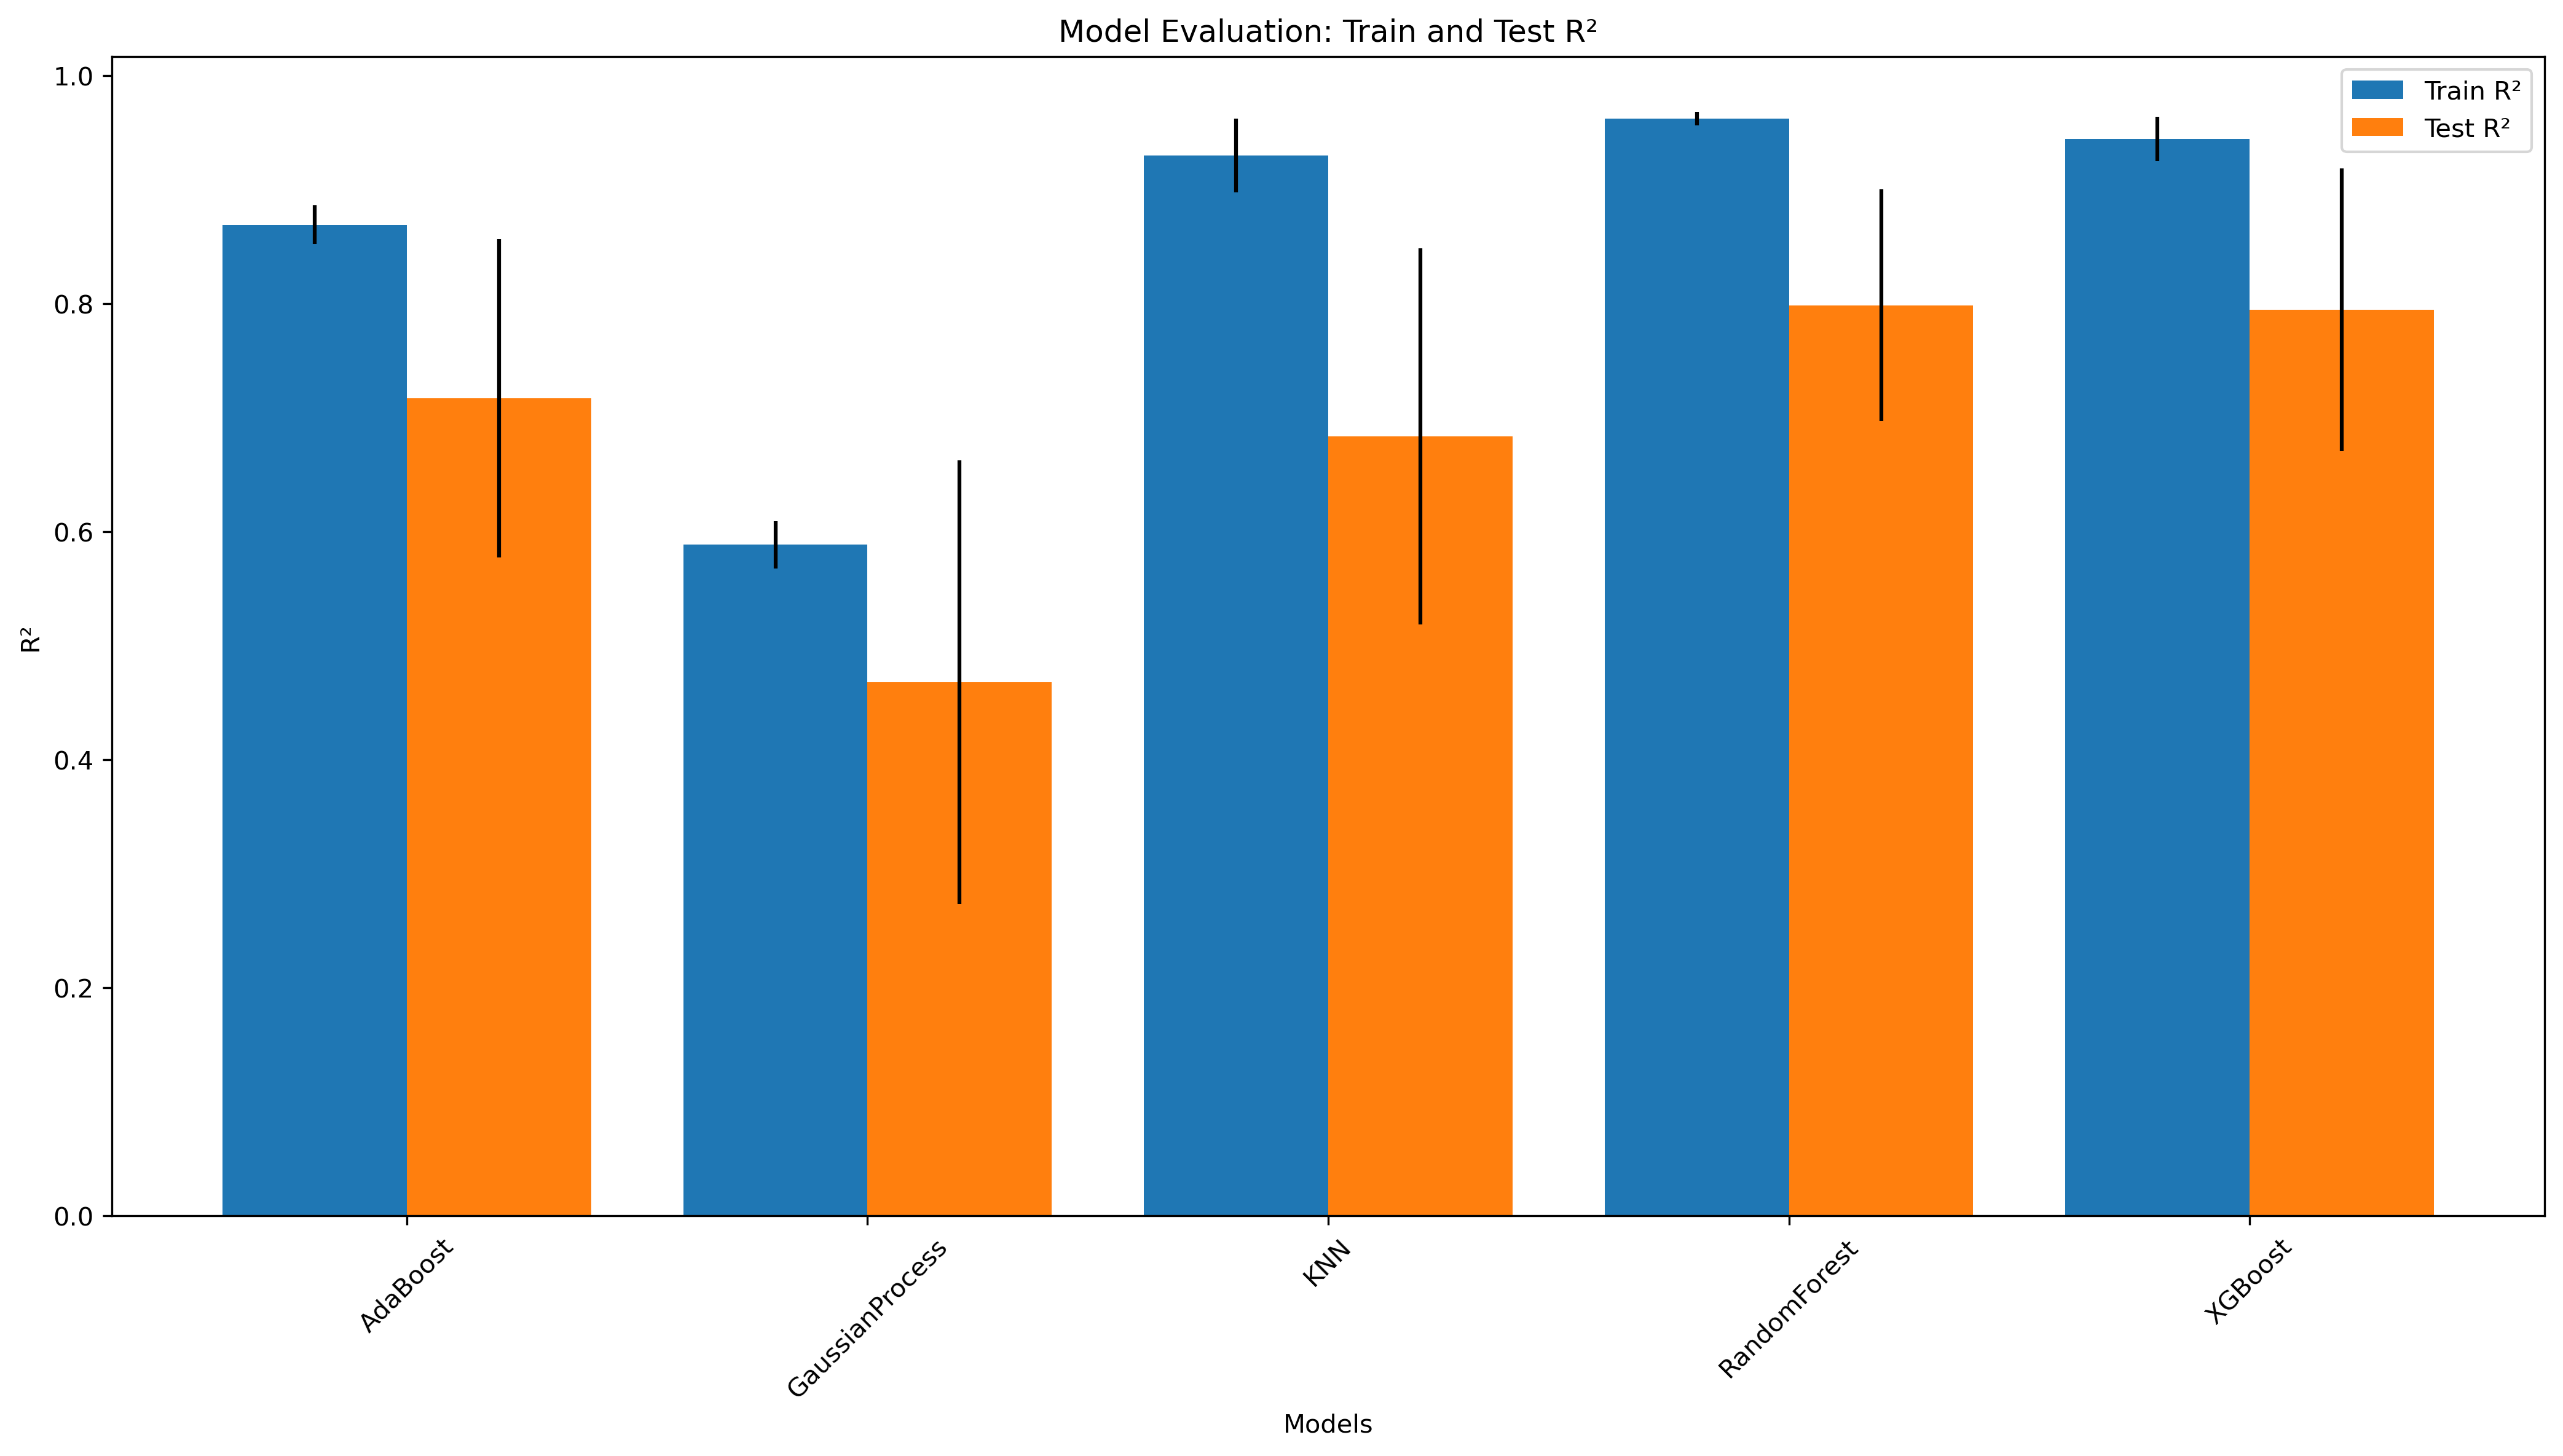

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 读取数据
data = pd.read_excel('HV.xlsx')
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

# 初始化存储结果的数组
results = []

# 随机种子
seeds = range(100)

# 模型列表
models = {
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'XGBoost': xgb.sklearn.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3),
    'GaussianProcess': GaussianProcessRegressor(kernel=C(0.1, (0.001, 0.1)) * RBF(0.5, (1e-4, 10)), n_restarts_optimizer=10, alpha=0.1),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42)
}

# 超参数搜索参数
param_grids = {
    'KNN': {'n_neighbors': np.arange(1, 100)},
    'RandomForest': {
        'n_estimators': [50, 75, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [3, 4, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True]
    },
    'XGBoost': {
        'learning_rate': [0.1],
        'n_estimators': [50, 75, 100],
        'max_depth': [1, 2, 3]
    }
}

# 遍历随机种子
for seed in seeds:
    # 切分数据
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=seed)
    
    for model_name, model in models.items():
        # 如果模型有超参数搜索
        if model_name in param_grids:
            grid = GridSearchCV(model, param_grids[model_name], cv=10, n_jobs=-1)
            model = grid.fit(x_train, y_train)
            best_params = model.best_params_
        else:
            model.fit(x_train, y_train)
            best_params = {}
        
        # 评估模型
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # 存储结果
        results.append({
            'Seed': seed,
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2,
            'Best_Params': best_params
        })

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 保存到Excel
results_df.to_excel('0.9hvmodel_evaluation.xlsx', index=False)

# 计算平均值和标准差
summary_df = results_df.groupby('Model').agg({
    'Train_R2': ['mean', 'std'],
    'Test_R2': ['mean', 'std']
}).reset_index()

summary_df.columns = ['Model', 'Train_R2_Mean', 'Train_R2_Std', 'Test_R2_Mean', 'Test_R2_Std']

# 输出平均值和标准差
print(summary_df)

# 可视化结果
plt.figure(dpi=300, figsize=(14, 8))

# 训练集R²
plt.bar(np.arange(len(summary_df)) - 0.2, summary_df['Train_R2_Mean'], yerr=summary_df['Train_R2_Std'], width=0.4, label='Train R²')
# 测试集R²
plt.bar(np.arange(len(summary_df)) + 0.2, summary_df['Test_R2_Mean'], yerr=summary_df['Test_R2_Std'], width=0.4, label='Test R²')

plt.xlabel('Models')
plt.ylabel('R²')
plt.title('Model Evaluation: Train and Test R²')
plt.xticks(ticks=np.arange(len(summary_df)), labels=summary_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()